In [1]:
"""
Name: example.ipynb
Authors: Stephan Meighen-Berger
Example for the package
"""

'\nName: example.ipynb\nAuthors: Stephan Meighen-Berger\nExample for the package\n'

In [2]:
# General imports
import numpy as np
import matplotlib.pyplot as plt
import sys
import pandas as pd

In [3]:
# Adding path to module
sys.path.append("../")

In [4]:
# picture path
PICS = '../pics/'

In [5]:
# Module imports
from fourth_day import Fourth_Day, config

In [6]:
# Some example settings
config['scenario']['population size'] = 1000
config['geometry']['volume'] = {
    'function': 'rectangle',
    'x_length': 6.,
    'y_length': 3.
}
config['scenario']['duration'] = 75
config['organisms']['emission fraction'] = 0.5

In [7]:
# Creating a fourth_day object
fd = Fourth_Day()

In [8]:
# Launching solver
fd.sim()

In [9]:
fd.statistics[-1]

,species,pos_x,pos_y,velocity,angle,radius,energy,observed,max_emission,emission fraction,regeneration,is_emitting,emission_duration,encounter photons,shear photons,photons
0,Paraphyllina ransoni Russell,3.040262,2.001054,0.004221,3.683594,0.001058,1.0,True,27.505491,0.5,0.001,False,-75.0,0.0,0.0,0.0
1,Aeginura grimaldii Maas,0.530250,1.394697,0.001445,3.434556,0.000768,1.0,True,8.393156,0.5,0.001,False,-75.0,0.0,0.0,0.0
2,Praya dubia (Quoy and Gaimard),0.527474,2.036181,0.007732,0.137014,0.000792,1.0,True,8.974659,0.5,0.001,False,-75.0,0.0,0.0,0.0
3,Nectopyramis natans (Bigelow),5.751093,1.274781,0.002573,2.393067,0.000959,1.0,True,9.558992,0.5,0.001,False,-75.0,0.0,0.0,0.0
4,Periphyllopsis braueri Vanhoeffen,2.774225,2.278406,0.005060,0.866522,0.001093,1.0,True,10.711722,0.5,0.001,False,-75.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1365,Halistemma sp. nov.a,0.000662,2.332449,0.002858,5.464045,0.000933,1.0,True,21.097962,0.5,0.001,False,-1.0,0.0,0.0,0.0
1366,Aegina citrea Eschscholtz,0.000470,1.782343,0.004209,1.005460,0.001334,1.0,True,12.573837,0.5,0.001,False,-1.0,0.0,0.0,0.0
1367,Atolla wyvillei Haeckel,0.000817,2.896389,0.004715,2.529033,0.001235,1.0,True,5.632759,0.5,0.001,False,-1.0,0.0,0.0,0.0
1368,Periphyllopsis braueri Vanhoeffen,0.000771,2.710559,0.003974,2.604038,0.001495,1.0,True,7.758700,0.5,0.001,False,-1.0,0.0,0.0,0.0


In [10]:
# Plotting standards
std_size = 10.
fontsize = 20.
lw=3.
h_length=1.5

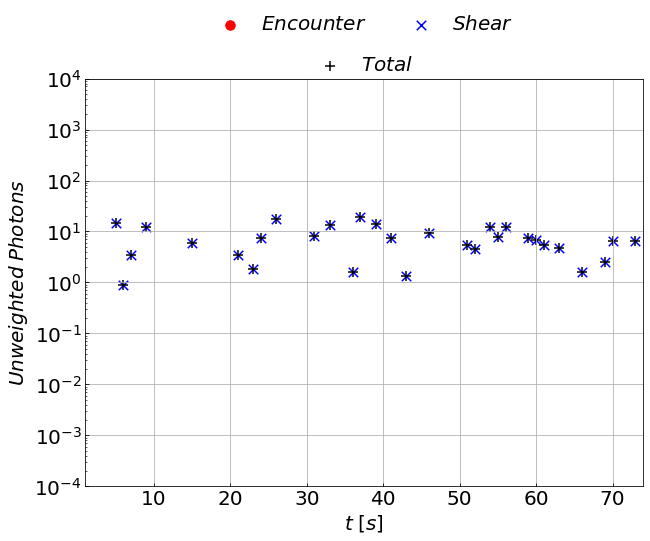

In [11]:
# Energy distributions
figure, (ax1) = plt.subplots(1, 1, figsize=(std_size, std_size * 6. / 8.), sharex=True)
data_enc = np.array([np.sum(fd.statistics[i].loc[:, 'encounter photons'].values)
                     for i in range(len(fd.t))])
data_shear = np.array([np.sum(fd.statistics[i].loc[:, 'shear photons'].values)
                       for i in range(len(fd.t))])
data = np.array([np.sum(fd.statistics[i].loc[:, 'photons'].values)
                     for i in range(len(fd.t))])
ax1.scatter(fd.t,
            data_enc,
            s=lw*30, color='r', label=r'$Encounter$', marker="o")
ax1.scatter(fd.t,
            data_shear,
            s=lw*30, color='b', label=r'$Shear$', marker="x")
ax1.scatter(fd.t,
            data,
            s=lw*30, color='k', label=r'$Total$', marker="+")
ax1.set_xlim(1e0, max(fd.t))
ax1.set_ylim(1e-4, 1e4)
ax1.set_xscale('linear')
ax1.set_yscale('log')
ax1.set_xlabel(r'$t\;[s]$', fontsize=fontsize)
ax1.set_ylabel(r'$Unweighted\;Photons$', fontsize=fontsize)
ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
ax1.grid(True)
h, l = ax1.get_legend_handles_labels()
lgd1 = ax1.legend(h[:2],l[:2], loc=9, bbox_to_anchor=(0.5, +1.2),
                  ncol=2, fontsize=fontsize, handlelength=h_length,
                  fancybox=True, frameon=False)
lgd2 = ax1.legend(h[2:],l[2:], loc=9, bbox_to_anchor=(0.5, +1.1),
                  ncol=2, fontsize=fontsize, handlelength=h_length,
                  fancybox=True, frameon=False)
ax1.add_artist(lgd1)
plt.show()

In [12]:
figure.savefig(PICS + "MC_Example.png",
               bbox_inches='tight')